In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:

data = pd.read_csv(r'D:\NIT Course\NIT Data Science Course\Deep Learning\ANN Practice\weatherAUS.csv\weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### About Data :
- #### The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.


- #### In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
numerical_data = data.select_dtypes(include=['int', 'float'])

for col in numerical_data.columns:
    print(f"Column: {col}")
    print(numerical_data[col].value_counts())  # frequencies
    print("-" * 40)

Column: MinTemp
MinTemp
11.0    899
10.2    898
9.6     896
10.5    884
9.0     872
       ... 
29.5      1
31.2      1
30.3      1
31.0      1
30.2      1
Name: count, Length: 389, dtype: int64
----------------------------------------
Column: MaxTemp
MaxTemp
 20.0    885
 19.0    843
 19.8    840
 20.4    834
 19.9    823
        ... 
-3.0       1
-4.8       1
 45.6      1
 46.2      1
 48.1      1
Name: count, Length: 505, dtype: int64
----------------------------------------
Column: Rainfall
Rainfall
0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
115.0        1
126.0        1
158.0        1
7.3          1
69.0         1
Name: count, Length: 681, dtype: int64
----------------------------------------
Column: Evaporation
Evaporation
4.0     3339
8.0     2609
2.2     2095
2.0     2032
2.6     2003
        ... 
42.3       1
41.8       1
50.2       1
42.8       1
39.6       1
Name: count, Length: 358, dtype: int64
--------------------------------

#### Initial Observation
- #### There are missing values in the dataset 
- #### Dataset include numerical and categorical values 
- #### Date column has data type object i will convert it to datatime 

#### Check the null values 

In [13]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
data.isna().mean()* 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

### Data Visualization and Cleaning

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\2141442587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=data['RainTomorrow'], palette=cols)


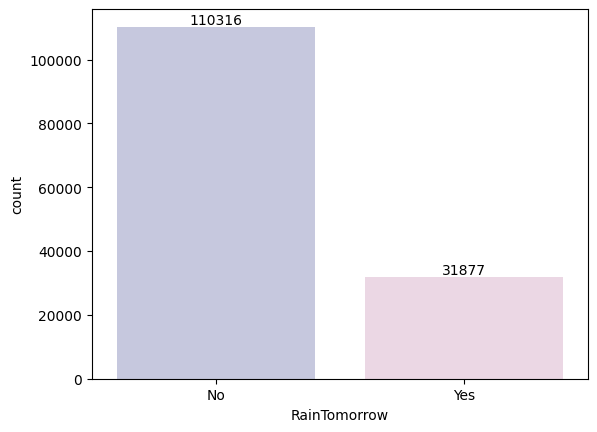

In [21]:
# Distribution of the Categorical Columns 
cols=["#C2C4E2","#EED4E5"]
plt.figure()
ax = sns.countplot(data=data, x=data['RainTomorrow'], palette=cols)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


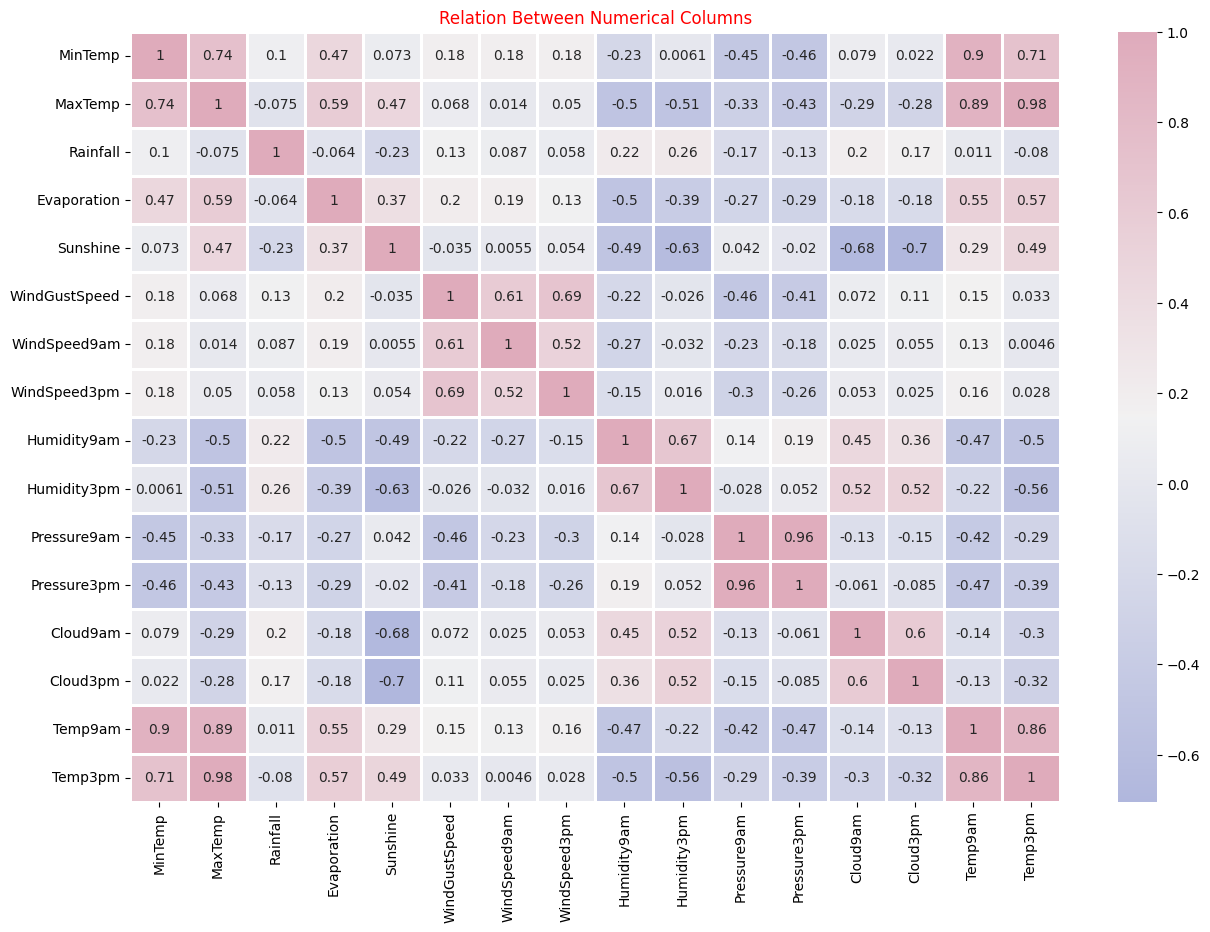

In [32]:
### Relation between the numerical columns 
corr_mat = data.corr(numeric_only=True)
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, cmap=cmap, linewidth=2)
plt.title('Relation Between Numerical Columns', c='red')
plt.show()

In [ ]:
### Convert the Date into date_time 
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year and month from the Date 
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [38]:
data['day'] = data.Date.dt.day

In [39]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [40]:
# I perform cyclic feature encoding    
# Normalize the data 
#     θ = 2π⋅value / max_val
 # Why we used this ?
 #   If you encode hours as 0, 1, 2, … 23:
 #   The model thinks 23 is very far from 0 (a distance of 23 units).
 # But in reality, 23:00 and 00:00 are just 1 hour apart!
 # So the model misinterprets the relationship.

def cyclic_feature_encoding(data , col, max_val):
    data[ col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val) # For sine encoding 
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/ max_val) # for cosine encoding
    
    return data 

# Encode month and day 
data = cyclic_feature_encoding(data, 'month', 12)
data = cyclic_feature_encoding(data, 'day', 31)

data.head()
    
    


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,day,month_sin,month_cos,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,1,-2.449294e-16,1.0,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,2,-2.449294e-16,1.0,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,3,-2.449294e-16,1.0,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,4,-2.449294e-16,1.0,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,5,-2.449294e-16,1.0,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

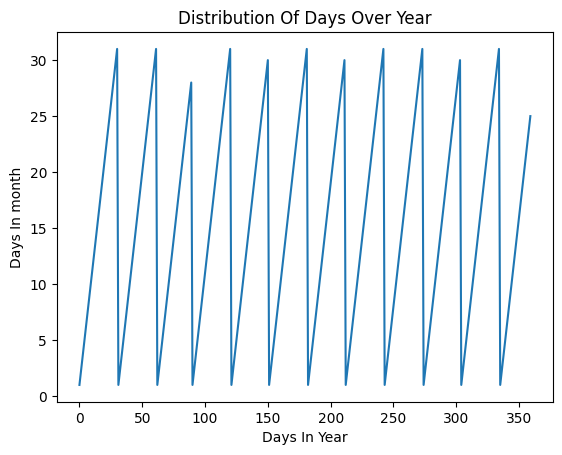

In [46]:
section = data[:360]
tm = section['day'].plot()
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")


#### As expected, the `year` attribute of data repeats. However in this for the `true cyclic nature` is not presented in a `continuous manner`. Splitting `months and days` into `Sine` and `cosine` combination provides the `cyclical continuous feature`. This can be used as `input features to ANN`.

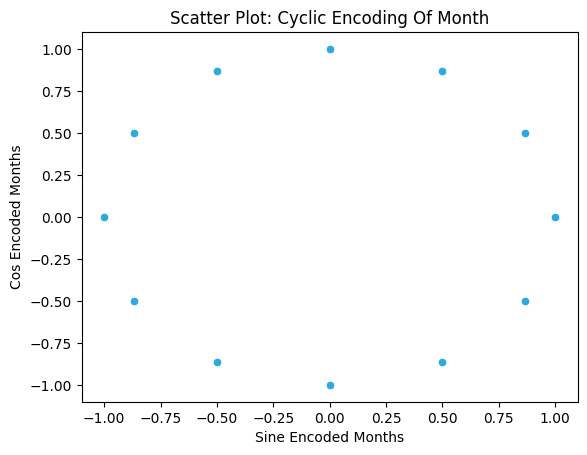

In [55]:
sns.scatterplot(data = data , x = 'month_sin', y='month_cos', color = "#2DA9DF")
plt.title('Scatter Plot: Cyclic Encoding Of Month')
plt.xlabel("Sine Encoded Months")
plt.ylabel("Cos Encoded Months")
plt.show()

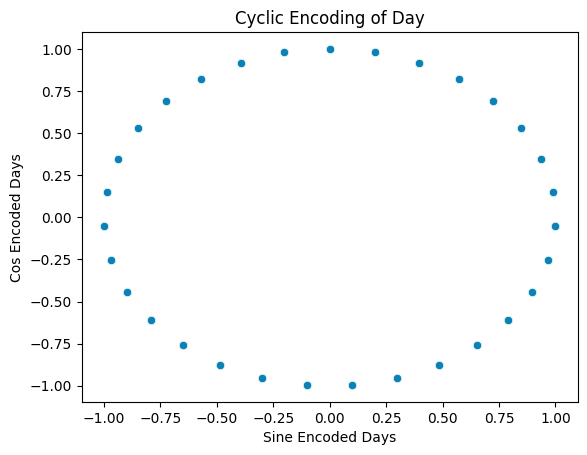

In [60]:
# Scatter plot of Cyclic encoding of day

sns.scatterplot(x = data['day_sin'], y=data['day_cos'], color = "#0B82B5FF")
plt.title('Cyclic Encoding of Day')
plt.xlabel("Sine Encoded Days")
plt.ylabel("Cos Encoded Days")
plt.show()

#### handle the Missing Values in Numerical and Categorical Features 

In [63]:
# Check the null values 
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
month_sin            0
month_cos            0
day_sin              0
day_cos              0
dtype: int64

#### Handle the missing value of categorical columns

In [87]:
# Check missing values in categorical variable '
cat_var = list(data.dtypes[data.dtypes == 'object'].index)

print(f"Categorical Variables : {cat_var}")
print("\nCount Of Null Values :")
for val in cat_var:
    null_values = data[val].isnull().sum()
    print(f"{val} : {null_values}")

Categorical Variables : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Count Of Null Values :
Location : 0
WindGustDir : 10326
WindDir9am : 10566
WindDir3pm : 4228
RainToday : 3261
RainTomorrow : 3267


In [92]:
### Fill This missing values with the mode of that columns 

for val in cat_var :
    data[val].fillna(data[val].mode()[0], inplace = True)

data[cat_var].isnull().sum()

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\2454308722.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[val].fillna(data[val].mode()[0], inplace = True)


Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### I am successfully handle the missing values of the categorical column 
#### I used `mode` imputation to fill this missing values 
#### After filling the missing value i varify. After that there are no missing values in the categorical columns 

### Handle the missing values of the Numerical features 
- #### 1. Check the missing values
- #### 2. Remove if required otherwise fill using the different imputation technique 
- #### 3. I can fill this missing values using `median` imputation 

In [117]:
num_var = list(data.select_dtypes(include=['int', 'float']).columns)
print(f"Numerical Columns : \n{num_var}")

col_with_null = [col for col in num_var if data[col].isnull().any()]
print(f"\nNumerical columns with nulls: \n{col_with_null}")


Numerical Columns : 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day', 'month_sin', 'month_cos', 'day_sin', 'day_cos']

Numerical columns with nulls: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [118]:
# Check the null values in the numerical columns 
    
for val in col_with_null:
    null_values = data[val].isnull().sum()
    print(f"{val} : {null_values}")

MinTemp : 1485
MaxTemp : 1261
Rainfall : 3261
Evaporation : 62790
Sunshine : 69835
WindGustSpeed : 10263
WindSpeed9am : 1767
WindSpeed3pm : 3062
Humidity9am : 2654
Humidity3pm : 4507
Pressure9am : 15065
Pressure3pm : 15028
Cloud9am : 55888
Cloud3pm : 59358
Temp9am : 1767
Temp3pm : 3609


In [120]:
# fill the null values with the median of the columns 
for val in col_with_null:
    data[val].fillna(data[val].median(), inplace = True)

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\271707607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[val].fillna(data[val].median(), inplace = True)
C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\271707607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [121]:
data[col_with_null].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### We can Successfully fill the null values of the numerical columns 

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\2697318659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data.year, y = data.WindGustSpeed, palette='coolwarm', edgecolor = 'black')


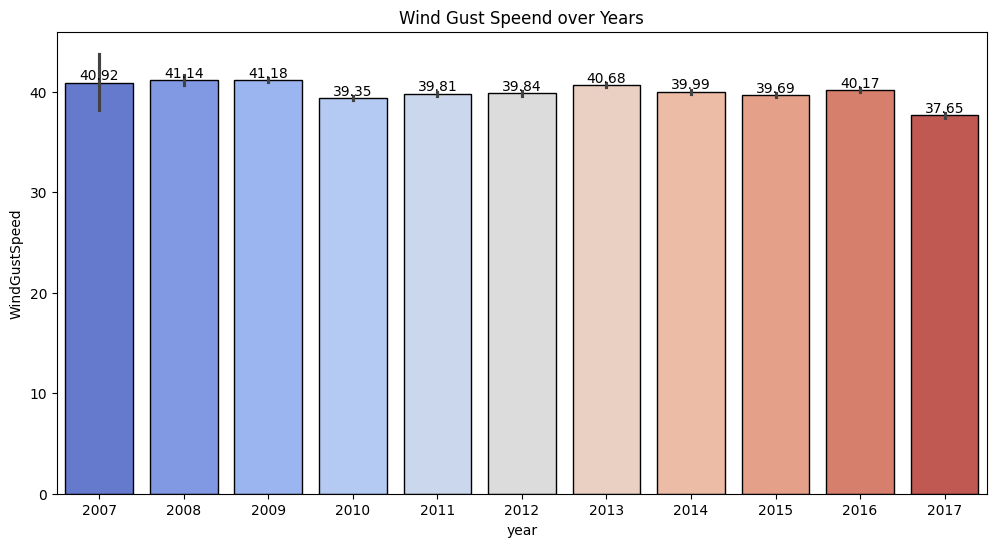

In [138]:
# Rain fall over a year 
plt.figure(figsize=(12,6))
ax = sns.barplot(x = data.year, y = data.WindGustSpeed, palette='coolwarm', edgecolor = 'black')
for label in ax.containers:
     ax.bar_label(label,fmt="%.2f")
     
plt.title('Wind Gust Speend over Years')
plt.show()

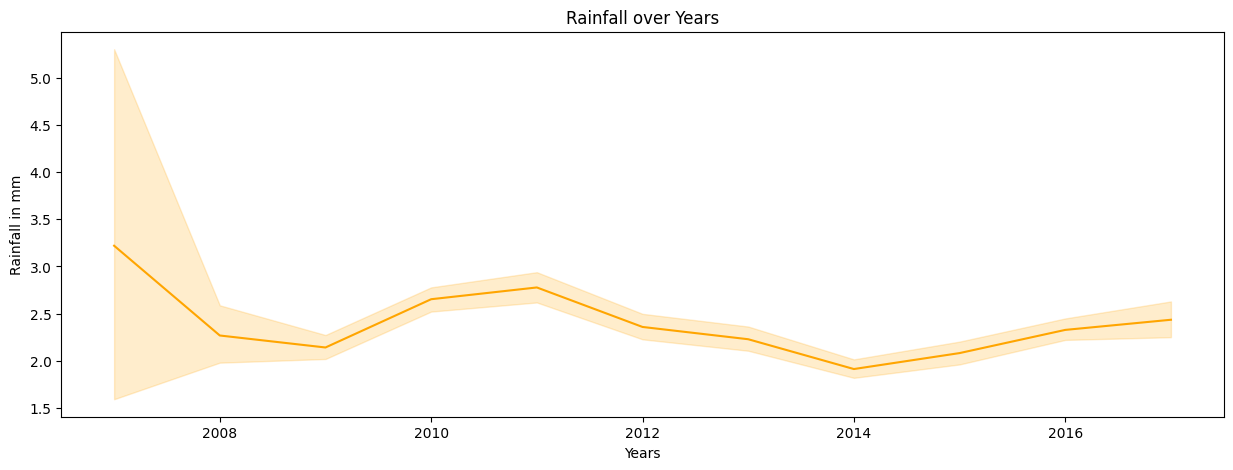

In [157]:
# Rainfall over year 
plt.figure(figsize=(15,5))
sns.lineplot(x = data.year, y = data.Rainfall, color = 'orange')
plt.title('Rainfall over Years')
plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.show()

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\3067632136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data.Location, y = data.Rainfall, palette='deep', edgecolor='black')


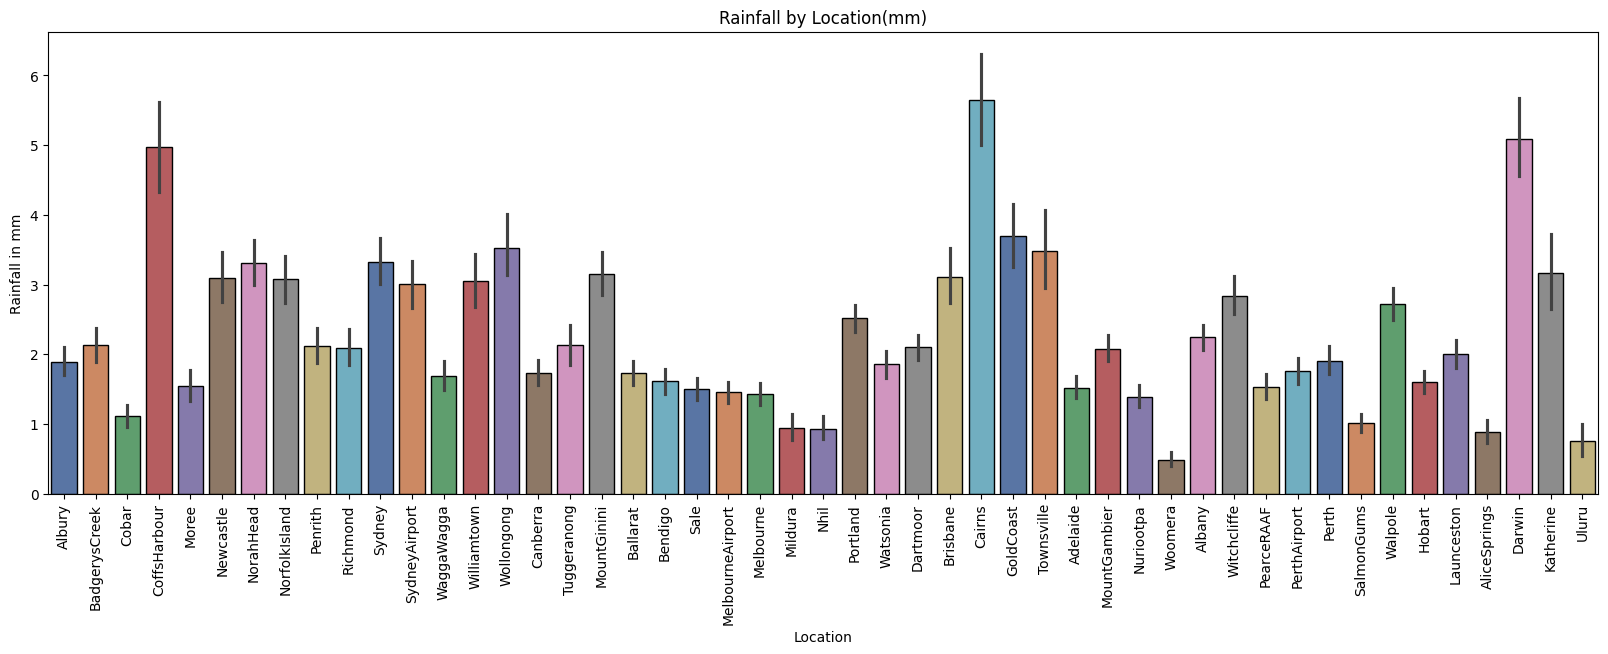

In [156]:
plt.figure(figsize = (20, 6))
sns.barplot(x = data.Location, y = data.Rainfall, palette='deep', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Rainfall by Location(mm)')
plt.xlabel('Location')
plt.ylabel('Rainfall in mm')
plt.show()


### Data Preprocessing 
#### Steps Involve in Preprocessing 
#### Label encoding columns with categorical data
#### Perform the scaling of the features
#### Detecting outliers
#### Dropping the outliers based on data analysis

In [164]:
# label encoding the categorical variable 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for i in object_cols:
    data[i] = le.fit_transform(data[i])
    
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,day,month_sin,month_cos,day_sin,day_cos
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,21.8,0,0,2008,12,1,-2.449294e-16,1.0,0.201299,0.979530
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,24.3,0,0,2008,12,2,-2.449294e-16,1.0,0.394356,0.918958
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,23.2,0,0,2008,12,3,-2.449294e-16,1.0,0.571268,0.820763
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,26.5,0,0,2008,12,4,-2.449294e-16,1.0,0.724793,0.688967
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,29.7,0,0,2008,12,5,-2.449294e-16,1.0,0.848644,0.528964


In [165]:
features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1)
target = data['RainTomorrow']

In [170]:
col_names = list(features.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,-6.252542e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-1.250508e-17,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,6.252542e-18,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,8.597245e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,3.126271e-18,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-7.034109e-18,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,-9.574204e-18,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,1.250508e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,2.032076e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\2961525613.py:5: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


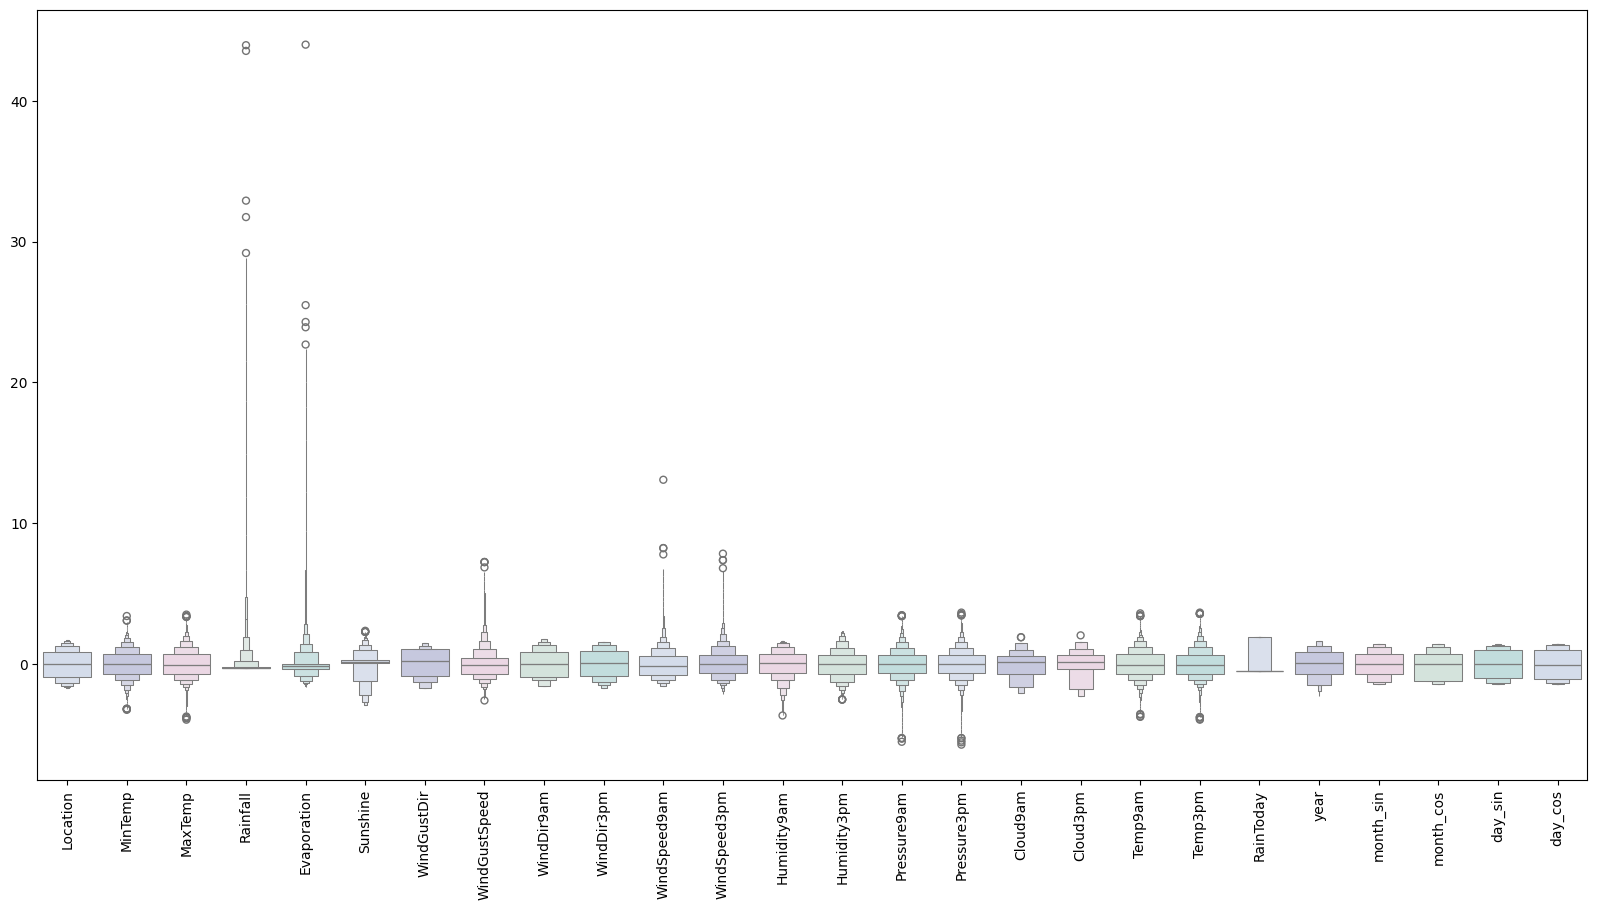

In [171]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [172]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

C:\Users\vrush\AppData\Local\Temp\ipykernel_1852\1688296607.py:4: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


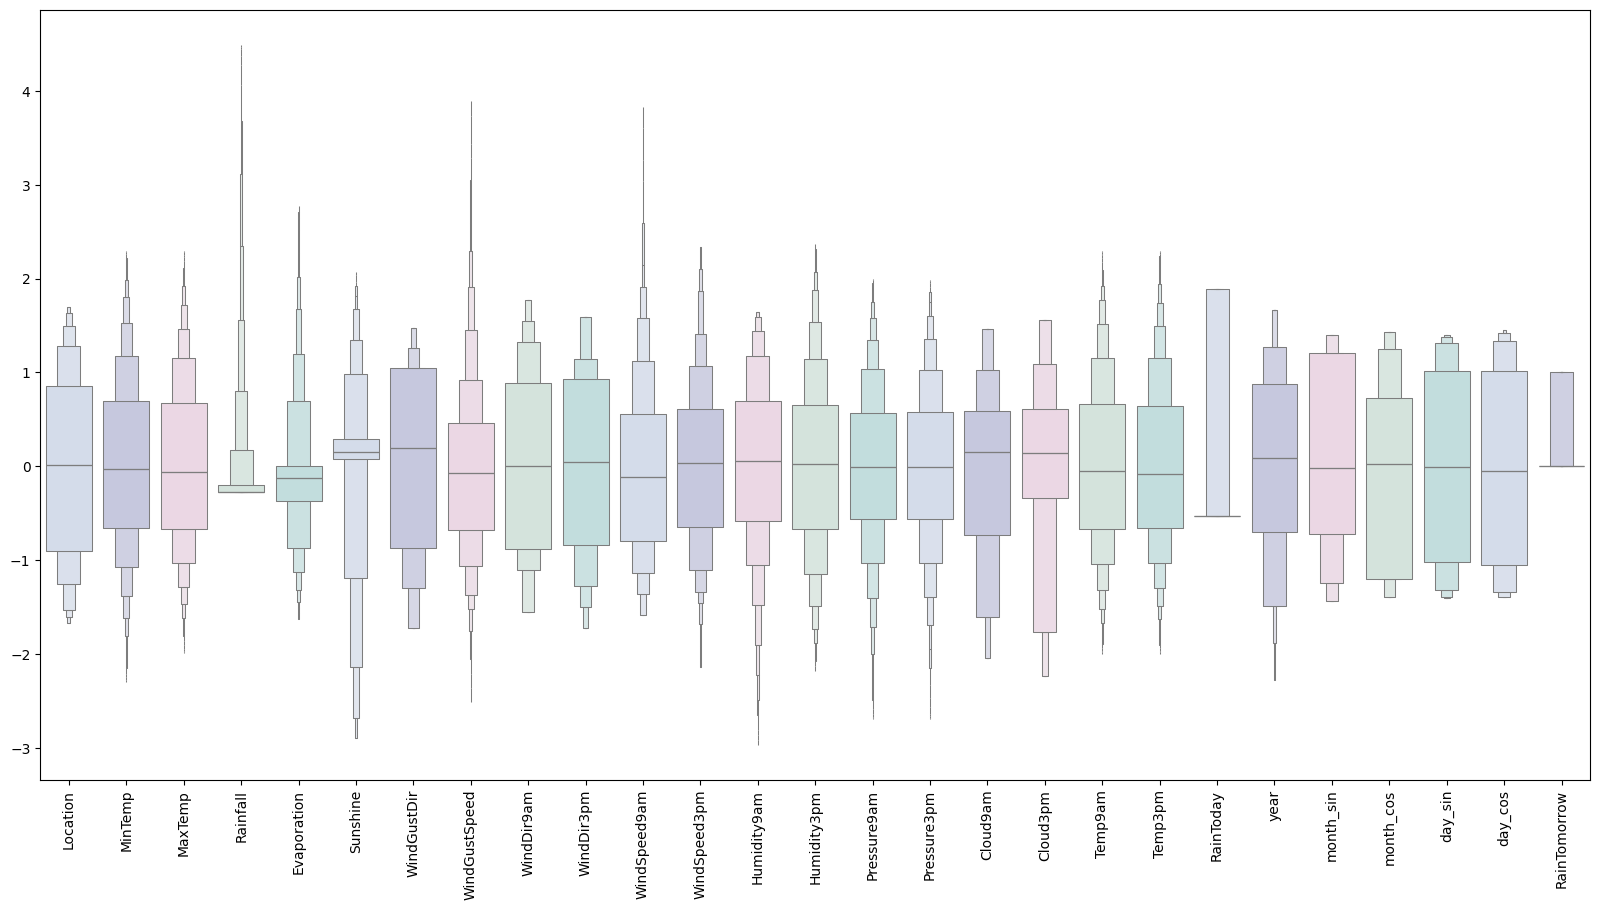

In [173]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

### Model Building

In [179]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [177]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training Data Shape :")
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}")

print("\nTesting Data Shape :")
print(f"X_test Shape : {X_test.shape}")
print(f"y_test Shape : {y_test.shape}")

Training Data Shape :
X_train Shape : (102028, 26)
y_train Shape : (102028,)

Testing Data Shape :
X_test Shape : (25508, 26)
y_test Shape : (25508,)


In [188]:
# Add the Early stoping 
callback = EarlyStopping(
    min_delta = 0.001, # minimum amount of change to count as improvement 
    patience =  20 , # How many epochs to wait before stoping 
    restore_best_weights=True,
    mode = 'auto'
)

# Initialize the NN 
model = Sequential()

# add the input and hiddne layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# optimizer 
adam = Adam(learning_rate=0.00009)
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])


# train the model 
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 150, callbacks=callback, validation_split = 0.2, n_jobs=-1)

  

c:\Users\vrush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7845 - loss: 0.4700 - val_accuracy: 0.7884 - val_loss: 0.3892
Epoch 2/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7846 - loss: 0.4185 - val_accuracy: 0.7884 - val_loss: 0.3832
Epoch 3/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7846 - loss: 0.4154 - val_accuracy: 0.7884 - val_loss: 0.3808
Epoch 4/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7846 - loss: 0.4133 - val_accuracy: 0.7884 - val_loss: 0.3793
Epoch 5/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7846 - loss: 0.4121 - val_accuracy: 0.7884 - val_loss: 0.3784
Epoch 6/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7846 - loss: 0.4126 - val_accuracy: 0.7884 - val_loss: 0.3770
Epoch 7/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7846 - loss: 0.4137 - val_accuracy: 0.7884 - val_loss: 0.3761
Epoch 8/150
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7846 - loss: 

In [191]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.784471,0.469976,0.788380,0.389193
1,0.784559,0.418453,0.788380,0.383158
2,0.784559,0.415421,0.788380,0.380849
3,0.784559,0.413310,0.788380,0.379266
4,0.784559,0.412053,0.788380,0.378408
...,...,...,...,...
75,0.838642,0.370400,0.852242,0.344442
76,0.837319,0.369413,0.853262,0.345273
77,0.836996,0.369813,0.852203,0.345670
78,0.838358,0.369008,0.852125,0.345267


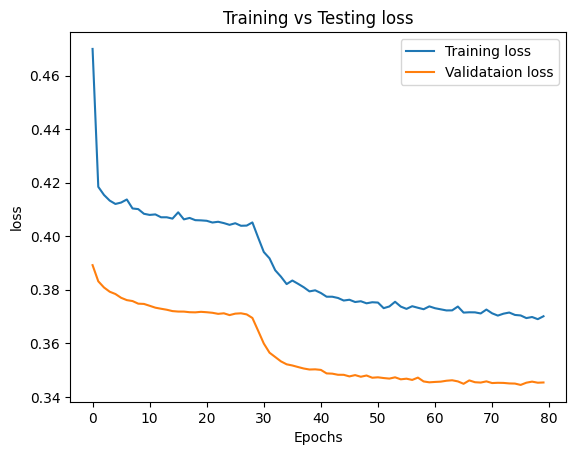

In [199]:
plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label = 'Validataion loss')

plt.title('Training vs Testing loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

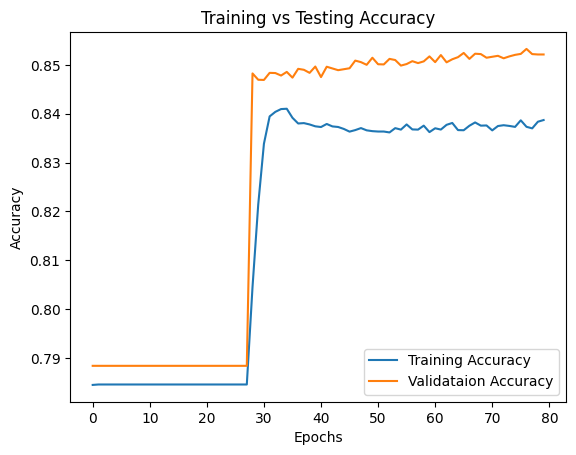

In [200]:
plt.plot(history_df.loc[:, ['accuracy']], label = 'Training Accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label = 'Validataion Accuracy')

plt.title('Training vs Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# confusion matrix , accuracy , classification report 

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5)

798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]], shape=(25508, 1))

<Axes: >

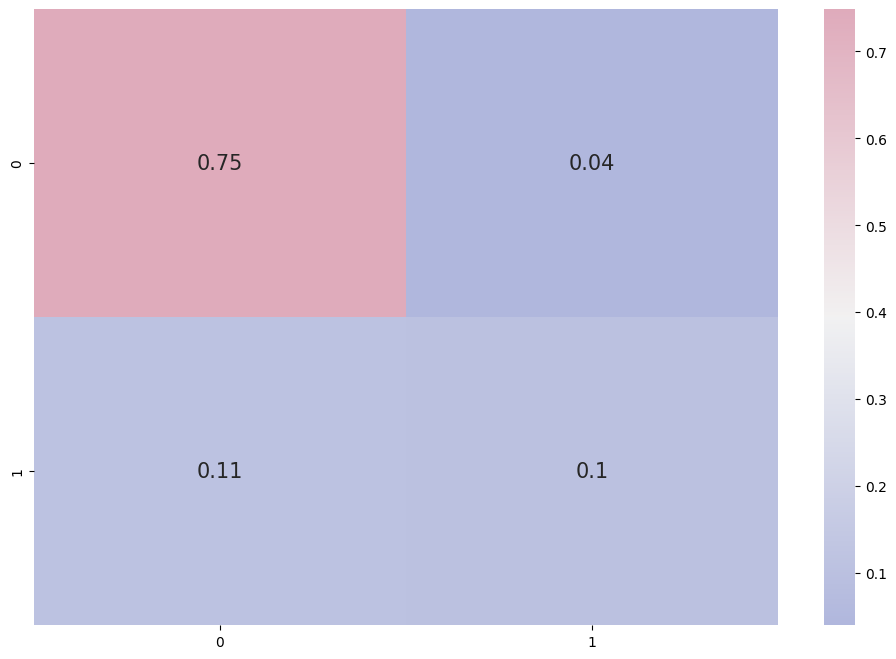

In [202]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     20110
           1       0.72      0.49      0.58      5398

    accuracy                           0.85     25508
   macro avg       0.80      0.72      0.75     25508
weighted avg       0.84      0.85      0.84     25508



In [205]:
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)

Accuracy : 85.17327897130312
